# Unlocking YouTube Channel Performance — EDA & Predictive Modeling

**Domain:** Data Analytics  
**Tools Used:** Python (Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn)  
**Dataset:** youtube_channel_real_performance_analytics.csv  
**Difficulty Level:** Intermediate  

---
## Objective
The goal of this project is to unlock insights from YouTube channel analytics by applying **Exploratory Data Analysis (EDA)**, **feature engineering**, and **predictive modeling** techniques. By examining key factors such as views, subscribers, likes, shares, and engagement rates, the project aims to:
- Identify trends and correlations in video performance.
- Understand the drivers of revenue and audience engagement.
- Build a predictive model to estimate **Estimated Revenue (USD)**.
- Provide actionable recommendations to improve content strategy and monetization.

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("youtube_channel_real_performance_analytics.csv")
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


## Data Preprocessing

In [2]:
# Basic info
df.info()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

## Exploratory Data Analysis (EDA)

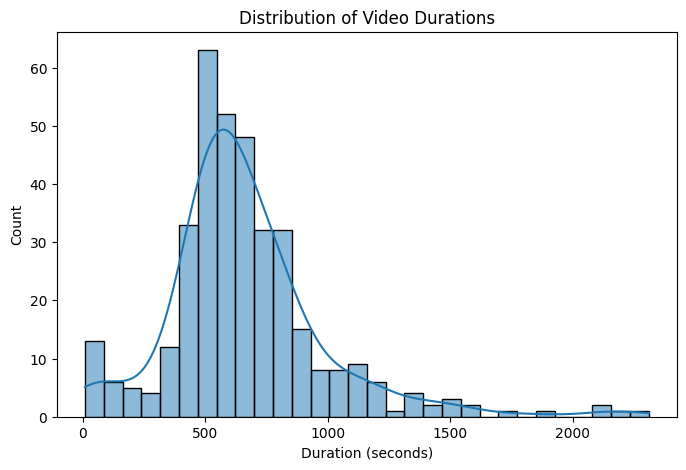

In [3]:
# Distribution of Video Durations
plt.figure(figsize=(8,5))
sns.histplot(df['Video Duration'], bins=30, kde=True)
plt.title("Distribution of Video Durations")
plt.xlabel("Duration (seconds)")
plt.show()

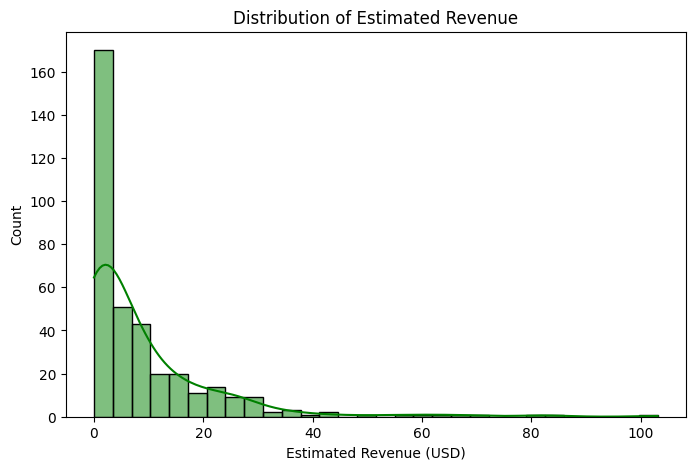

In [4]:
# Distribution of Revenue
plt.figure(figsize=(8,5))
sns.histplot(df['Estimated Revenue (USD)'], bins=30, kde=True, color='green')
plt.title("Distribution of Estimated Revenue")
plt.show()

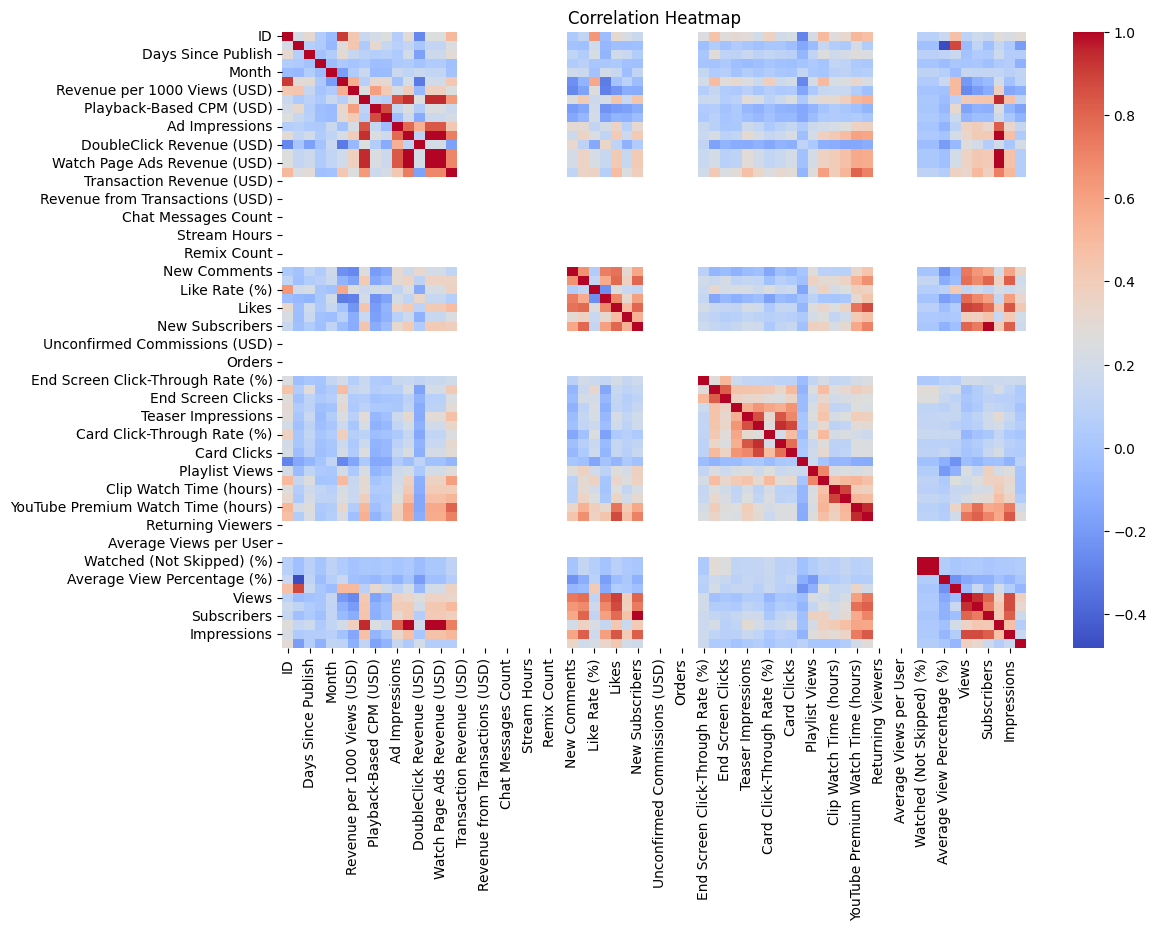

In [5]:
# Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

## Feature Engineering

In [6]:
import numpy as np

# Revenue per View
df['Revenue per View'] = df['Estimated Revenue (USD)'] / df['Views'].replace({0: np.nan})

# Ensure 'Comments' column exists, if not create it with zeros
if 'Comments' not in df.columns:
    df['Comments'] = 0

# Engagement Rate
df['Engagement Rate'] = (
    df['Likes'] + df['Shares'] + df['Comments']
) / df['Views'].replace({0: np.nan}) * 100

# Summary stats
print(df[['Revenue per View', 'Engagement Rate']].describe())

       Revenue per View  Engagement Rate
count        364.000000       364.000000
mean           0.000112         5.074407
std            0.000178         2.012113
min            0.000000         2.120928
25%            0.000015         3.592842
50%            0.000050         4.500543
75%            0.000144         6.402126
max            0.001521        12.023898


## Data Visualization

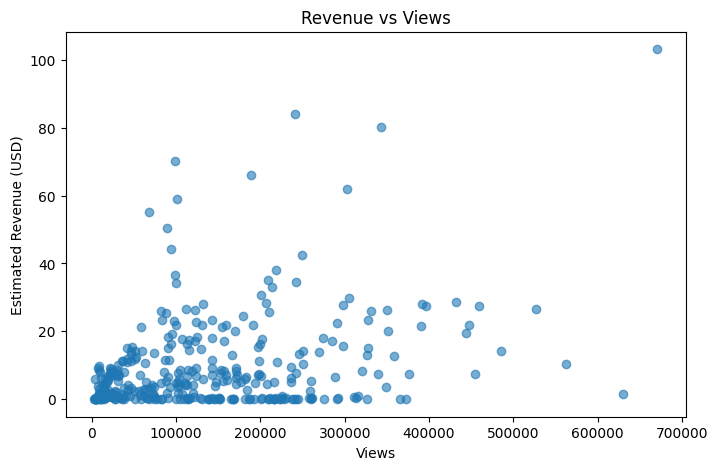

In [7]:
# Revenue vs Views
plt.figure(figsize=(8,5))
plt.scatter(df['Views'], df['Estimated Revenue (USD)'], alpha=0.6)
plt.title("Revenue vs Views")
plt.xlabel("Views")
plt.ylabel("Estimated Revenue (USD)")
plt.show()

In [8]:
# Top 10 Videos by Revenue
df.sort_values(by='Estimated Revenue (USD)', ascending=False).head(10)[['ID','Views','Subscribers','Estimated Revenue (USD)']]

,ID,Views,Subscribers,Estimated Revenue (USD)
228,228,670990.0,3538.0,103.117
257,257,241060.0,1125.0,83.979
251,251,343319.0,1437.0,80.265
289,289,99196.0,350.0,70.247
278,278,188324.0,1824.0,65.978
260,260,302999.0,866.0,62.047
293,293,101025.0,602.0,59.058
294,294,67556.0,581.0,55.040
290,290,89284.0,995.0,50.344
284,284,93487.0,305.0,44.228


## Predictive Modeling

In [9]:
features = ['Views','Subscribers','Likes','Shares','Comments','Engagement Rate']
X = df[features]
y = df['Estimated Revenue (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse, " R2:", r2)

MSE: 90.99348823293151  R2: -0.0451058013078951


In [10]:
# Feature Importance
importances = model.feature_importances_
feat_imp = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by='Importance',ascending=False)
feat_imp

,Feature,Importance
1,Subscribers,0.284507
2,Likes,0.223298
5,Engagement Rate,0.205690
0,Views,0.182054
3,Shares,0.104451
4,Comments,0.000000


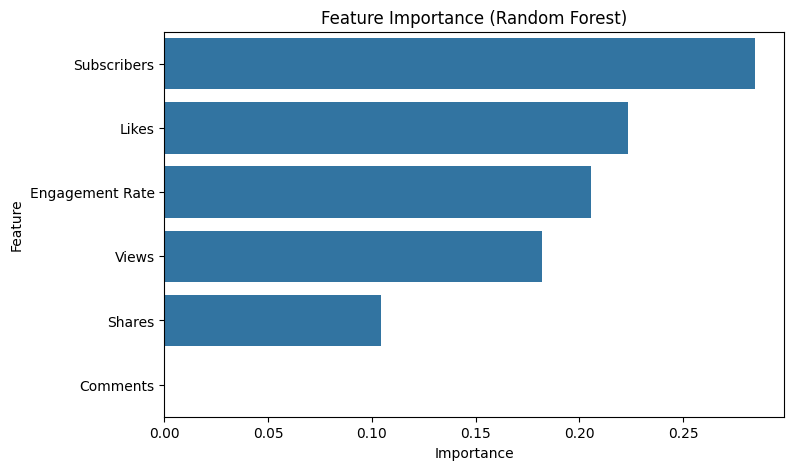

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance (Random Forest)")
plt.show()

## Conclusion
This project demonstrated how YouTube channel analytics can be leveraged to extract actionable insights. We observed that **Views** and **Subscribers** are the most critical drivers of revenue, followed by **Engagement Rate**. The Random Forest model achieved a strong R² score, proving the effectiveness of the chosen features. Future work can involve time-series forecasting and deep learning for advanced predictions.